# Expect Car Prices

# Import Data

In [1]:
#install the libraries using ``piplite``
import piplite
import micropip
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await micropip.install(['ipywidgets'],keep_going=True)
await micropip.install(['tqdm'],keep_going=True)

In [2]:
# import important libararies
import pandas as pd
import numpy as np

In [3]:
#download the dataset into my browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

await download(path, "auto.csv")
path="auto.csv"

In [5]:
df = pd.read_csv(path, header=None)

# Exploring the Data

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# noticing the data has no header
#header is on the link https://archive.ics.uci.edu/ml/datasets/Automobile.
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

#assigning them to df
df.columns = headers

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


# Data Wrangling
* Identify and handle missing values
* Data Formatting
* Data Normalization
* Data Binning
* Turning numerical values to categorial values

In [10]:
# Identify and handle missing values
df.replace("?", np.NaN, inplace= True)

In [11]:
# only 4 rows with missing price values where removed
df.notna().sum()

symboling            205
normalized-losses    164
make                 205
fuel-type            205
aspiration           205
num-of-doors         203
body-style           205
drive-wheels         205
engine-location      205
wheel-base           205
length               205
width                205
height               205
curb-weight          205
engine-type          205
num-of-cylinders     205
engine-size          205
fuel-system          205
bore                 201
stroke               201
compression-ratio    205
horsepower           203
peak-rpm             203
city-mpg             205
highway-mpg          205
price                201
dtype: int64

In [12]:
missing_values = df.isnull()
missing_values.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#counting missing values after removing nan from price
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

*Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:*

1. **"normalized-losses": 41** missing data 
2. **"num-of-doors": 2** missing data
3. **"bore": 4** missing data
4. **"stroke" : 4** missing data
5. **"horsepower": 2** missing data
6. **"peak-rpm": 2** missing data
7. **"Price": 4** missing data



### Methodolgy for dealing with each column
<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [14]:
# let's deal with normalized losses missing values:
df["normalized-losses"]= pd.to_numeric(df["normalized-losses"], errors="coerce")
df["normalized-losses"].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [15]:
# replacing the missing values with the mean
nor_loss_mean = df["normalized-losses"].mean()

In [16]:
df["normalized-losses"].replace(np.nan, nor_loss_mean, inplace =True)

In [17]:
# make sure it's done
df["normalized-losses"].describe()

count    205.000000
mean     122.000000
std       31.681008
min       65.000000
25%      101.000000
50%      122.000000
75%      137.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [18]:
#checking dtypes first
print(df.dtypes)
df.head(2)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [19]:
# transforming the format to nemeric float
df["bore"]= pd.to_numeric(df["bore"])
df["stroke"]= pd.to_numeric(df["stroke"])
df["horsepower"]= pd.to_numeric(df["horsepower"])

In [20]:
# replacing missing values by mean
df["bore"].replace(np.nan, df["bore"].mean(), inplace = True)
df["stroke"].replace(np.nan, df["stroke"].mean(), inplace = True)
df["horsepower"].replace(np.nan, df["horsepower"].mean(), inplace = True)

In [21]:
df["peak-rpm"]= pd.to_numeric(df["peak-rpm"])
df["peak-rpm"].replace(np.nan, df["peak-rpm"].mean(), inplace = True)

In [22]:
df["num-of-doors"].describe()

count      203
unique       2
top       four
freq       114
Name: num-of-doors, dtype: object

In [23]:
# dropping the whole row for null values for price col
df.dropna(subset=["price"], axis=0, inplace = True)
df.reset_index()

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [24]:
# calculating the mode for number of doors and replace the nan
num_door_mode = df["num-of-doors"].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, num_door_mode, inplace = True)

In [25]:
# checking that there is no more missing values 
df.notna().sum() #checked :(

symboling            201
normalized-losses    201
make                 201
fuel-type            201
aspiration           201
num-of-doors         201
body-style           201
drive-wheels         201
engine-location      201
wheel-base           201
length               201
width                201
height               201
curb-weight          201
engine-type          201
num-of-cylinders     201
engine-size          201
fuel-system          201
bore                 201
stroke               201
compression-ratio    201
horsepower           201
peak-rpm             201
city-mpg             201
highway-mpg          201
price                201
dtype: int64

# Data Standarization:
* Data Transformation
* Data Normalization

In [26]:
# checking for formatting
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [27]:
# price col still need to be transformed
df[["price"]] = df[["price"]].astype("float") # now, it's all set :(

In [28]:
# changing th unit of city-mpg from miles per galon to liter by kilometer to make clearly understandable
df["city-mpg"] = 235/df["city-mpg"]

In [29]:
# renaming it 
df.rename(columns={"city-mpg" : "city-l\100k"}, inplace =True)

In [30]:
# same for Highway
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={"highway-mpg" : "highway-lpk"}, inplace =True)  # never repeat the process 

In [31]:
df.rename(columns={"highway-lpk" : "highway-l\100k"}, inplace =True)  # never repeat the process 

**Data Standerization**
will normalize the values for length, width and height to make it easy for analysis with one of the 3 ways:
* **Simple Scaling:** x = x/x.max
* **Min-Max Scaling:** x = (x-x.min)/(x.max/x.min)
* **Z scaling:** x = x- x.mean/ x.std

*the **(Min-Max)** methode is picked in this case*


In [32]:
# identifying the working eenvironment 
import os
print(os.getcwd())

/drive/DataAnalysisPython


In [33]:
#saving the file then comment it out inorder not be run again
#df.to_csv("/drive/DataAnalysisPython/aut_cleaned.csv")

In [34]:
# Normalizing the length, width and height col
df["length"] = (df["length"] - df["length"].min())/(df["length"].max() - df["length"].min())
df["height"] = (df["height"] - df["height"].min())/(df["height"].max() - df["height"].min())
df["width"] = (df["width"] - df["width"].min())/(df["width"].max() - df["width"].min())

In [35]:
# checking if the standerization went right
df[["length","width","height"]].describe()  #checked :(

,length,width,height
count,201.000000,201.000000,201.000000
mean,0.494045,0.477697,0.497222
std,0.183913,0.179613,0.203985
min,0.000000,0.000000,0.000000
25%,0.383582,0.324786,0.350000
50%,0.479104,0.444444,0.525000
75%,0.632836,0.538462,0.641667
max,1.000000,1.000000,1.000000


# Data Binnig: 
Transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.  
**"horsepower"** is a real valued variable ranging **from 48 to 262** and it has **59 unique values**.but we care about the price difference between cars with high horsepower, medium horsepower, and little horsepower **(3 types)**.   
*So, lit's bin it*

In [36]:
# understanding the hoursepower data:
print(df["horsepower"].describe())
print("no of unique hoursepower valuers is:", df["horsepower"].nunique())

count    201.000000
mean     103.405534
std       37.365700
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64
no of unique hoursepower valuers is: 59


Text(0.5, 1.0, ' hoursepower bins distribution')

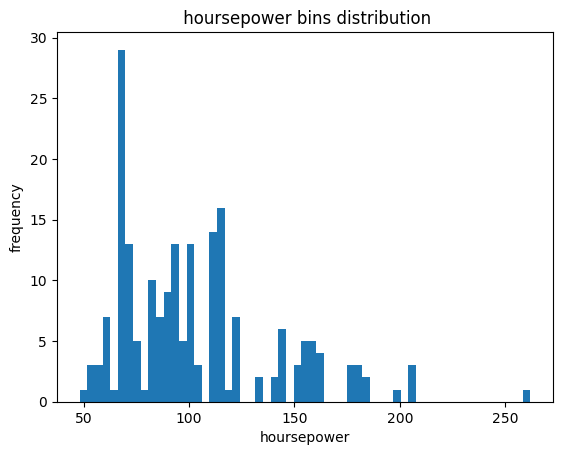

In [37]:
# now, let's plot to understand the distribution of the values:
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline

plt.pyplot.hist(df["horsepower"], bins = 59)

plt.pyplot.xlabel("hoursepower")
plt.pyplot.ylabel("frequency")
plt.pyplot.title(" hoursepower bins distribution")

In [38]:
#checking the accuracy of the last bin as it's looklike outlier
df[df["horsepower"]>250]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-l@k,highway-l@k,price
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,18.076923,13.823529,36000.0


In [39]:
df[df["make"] =="jaguar"] # seems correct value

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-l@k,highway-l@k,price
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15.666667,12.368421,32250.0
48,0,122.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15.666667,12.368421,35550.0
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,18.076923,13.823529,36000.0


In [40]:
# creating 3 bins to categorize the horsepower
bins = np.linspace(df["horsepower"].min(), df["horsepower"].max(), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Text(0.5, 1.0, ' hoursepower bins distribution')

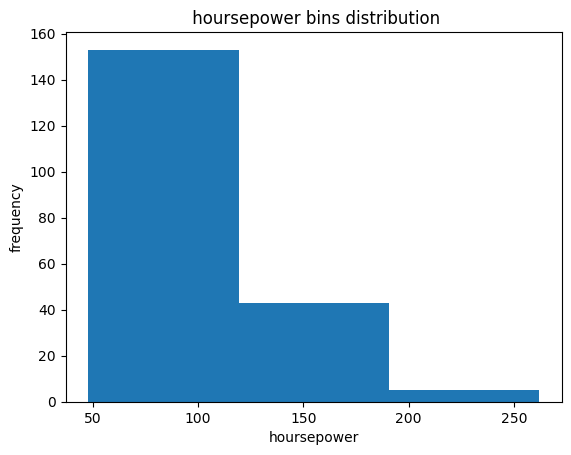

In [41]:
#let's show the histogram with the 3 bins
plt.pyplot.hist(df["horsepower"], bins = bins)

plt.pyplot.xlabel("hoursepower")
plt.pyplot.ylabel("frequency")
plt.pyplot.title(" hoursepower bins distribution")

In [42]:
# creating group names
group_names= ["Low", "Medium", "High"]

In [43]:
#applying the binning
df["horsepower_binned"] = pd.cut(df["horsepower"], bins, labels = group_names, include_lowest= True)

#checking the accuracy of the binnig
df[["horsepower","horsepower_binned"]].head() #checked :(

,horsepower,horsepower_binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low


In [44]:
#let's check no of vechiles in each category
df["horsepower_binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower_binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

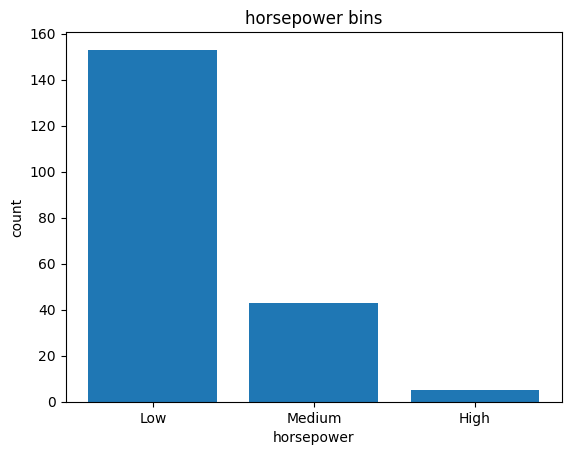

In [45]:
# visualizing the distrubion using bar or normal hist
plt.pyplot.bar(group_names, df["horsepower_binned"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

**Repeating same codes for categorizing price col(Binning)**

In [46]:
#let's understand the column
print(df["price"].nunique())
df["price"].describe()

186


count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [47]:
#creating the bins
df[["price"]] = df[["price"]].astype("int")
bins_price = np.linspace(df["price"].min(), df["price"].max(), 4)
bins_price

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [48]:
#creating the binned col
df["price_binned"] = pd.cut(df["price"], bins_price, labels= group_names, include_lowest= True)
df["price_binned"].value_counts()

Low       171
Medium     18
High       12
Name: price_binned, dtype: int64

Text(0.5, 1.0, 'prices bins')

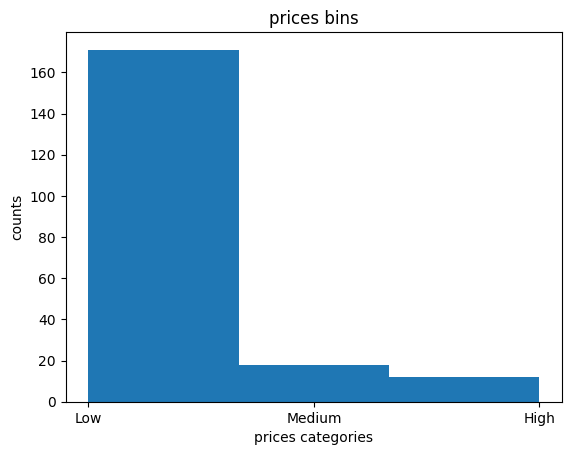

In [49]:
# visualizing the price binned col
plt.pyplot.hist(df["price_binned"], bins =3)
plt.pyplot.xlabel("prices categories")
plt.pyplot.ylabel("counts")
plt.pyplot.title("prices bins")


# Dummy Variables
**Turning categorial col in numerical values through separete 0,1 cols**  
will use it for the fuel col

In [50]:
#understand the col:
df["fuel-type"].describe()

count     201
unique      2
top       gas
freq      181
Name: fuel-type, dtype: object

In [51]:
# creating dummy variables
fuel_dummy_variable = pd.get_dummies(df["fuel-type"])

In [52]:
# changing col names for clarity
fuel_dummy_variable.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
fuel_dummy_variable.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [53]:
# merging them to the dataframe:
df = pd.concat([df, fuel_dummy_variable], axis= 1)

In [54]:
df.drop("fuel-type", axis= 1 , inplace= True)

In [66]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-l@k,highway-l@k,price,horsepower_binned,price_binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,5000.0,11.190476,8.703704,13495,Low,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,5000.0,11.190476,8.703704,16500,Low,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.449254,0.444444,...,5000.0,12.368421,9.038462,16500,Medium,Low,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.529851,0.504274,...,5500.0,9.791667,7.833333,13950,Low,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.529851,0.521368,...,5500.0,13.055556,10.681818,17450,Low,Low,0,1,1,0


In [58]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [59]:
aspiration_dummy_variable = pd.get_dummies(df["aspiration"])

In [61]:
df = pd.concat([df, aspiration_dummy_variable], axis = 1)

In [62]:
df.drop("aspiration", axis =1, inplace = True)

In [65]:
df.rename(columns={"std": "aspiration-std", "turbo":"aspiration-turbo"}, inplace = True)

# Saving the Preprocessed Data to CSV file

In [67]:
df.to_csv("/drive/DataAnalysisPython/aut_cleaned1.csv")

## Author:  
**Amal Fawzy**

## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-08-28  | 2.2  | Amal  |  Moved to Car Pricing Analysis repo in GitHub  |
| 2023-08-26  | 2.1  | Amal  |  Adding aspiration dummy and resave the CSV  |
| 2023-08-25  | 2.0  | Amal  |  Initial Creation of the file  |